# Working with SeismicDataset
Seismic dataset contains functions that calculate some parameters for the dataset.
## Content
* [Loading data](#Loading-data)
* [Find parameters for spherical divergence](#Find-parameters-for-spherical-divergence)

## Loading data
This function 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')

from seismicpro.batchflow import Pipeline, V, D
from seismicpro.src import (SeismicBatch, FieldIndex, seismic_plot,
                            gain_plot, calculate_sdc_quality,
                            measure_gain_amplitude, SeismicDataset)
from seismicpro.models import calc_derivative_diff

In [3]:
path_raw = '/notebooks/anton/sphere_difference/2_TAR_raw.sgy'
path_corr = '/notebooks/anton/sphere_difference/2_TAR_v2_t1.sgy'

field_index = (FieldIndex(name='raw', extra_headers=['offset'], path=path_raw).
               merge(FieldIndex(name='target', path=path_corr)))
field_index.head()

,offset,TraceNumber,TRACE_SEQUENCE_FILE,file_id,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw,target,target
FieldRecord,,,,,,
3237,3075,1,1,/notebooks/anton/sphere_difference/2_TAR_raw.sgy,1,/notebooks/anton/sphere_difference/2_TAR_v2_t1...
3237,3030,2,2,/notebooks/anton/sphere_difference/2_TAR_raw.sgy,2,/notebooks/anton/sphere_difference/2_TAR_v2_t1...
3237,2984,3,3,/notebooks/anton/sphere_difference/2_TAR_raw.sgy,3,/notebooks/anton/sphere_difference/2_TAR_v2_t1...
3237,2940,4,4,/notebooks/anton/sphere_difference/2_TAR_raw.sgy,4,/notebooks/anton/sphere_difference/2_TAR_v2_t1...
3237,2895,5,5,/notebooks/anton/sphere_difference/2_TAR_raw.sgy,5,/notebooks/anton/sphere_difference/2_TAR_v2_t1...


In [50]:
raw, samples = dataset.load_batch(dataset.indices[0], 'raw', slice(3000))

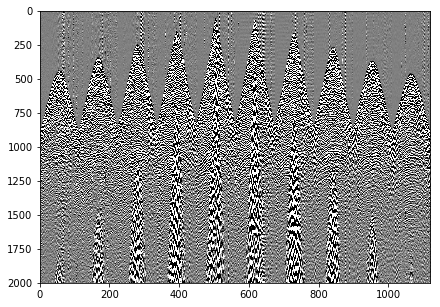

In [55]:
cv = 0.1
seismic_plot(raw, figsize=(7, 5), vmin=-cv, vmax=cv, cmap='gray', name='')

## Find parameters for spherical divergence

In [40]:
speed = np.array([1524]*700 + [1924.5]*300 + [2184.0]*400 +  [2339.6]*400 + 
                 [2676]*150 + [2889.5]*2250 + [3566]*2800 + [4785.3]*1000)

In [44]:
parameters = dataset.find_correctoin_parameters(src='raw', speed=speed, 
                                                loss=calculate_sdc_quality,
                                                started_point=(2, 1))

In [48]:
print('Optimal parameters for v_pow is {:.3}, for t_pow is {:.3}.'.format(*parameters))

Optimal parameters for v_pow is 2.06, for t_pow is 0.998.


In [49]:
print('Optimal parameters for v_pow is {:.3}, for t_pow is {:.3} from correction_params.'.format(*dataset.correction_params))

Optimal parameters for v_pow is 2.06, for t_pow is 0.998 from correction_params.
